# 04wk-1: 딥러닝의 기초 (2)

최규빈  
2022-09-22

> 회귀분석(2)– SSE와 MSE, step1의 다른버전 (torch.nn.Linear)

## 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-wezS4h765Rs5mQFoSjrLMk>

-   강의영상 재업로드 하였습니다.

# review

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv") 
df

In [27]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
X= torch.tensor([[1]*100,x]).T

In [44]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

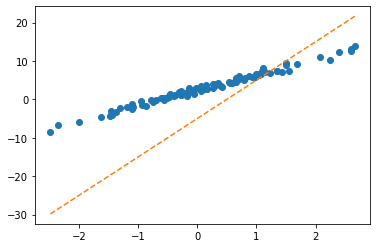

In [45]:
plt.plot(x,y,'o')
#plt.plot(x,-5+10*x,'--')
plt.plot(x,X@What.data,'--')

## ver1: loss = sum of squares error

In [67]:
alpha = 1/1000
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.sum((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [68]:
What

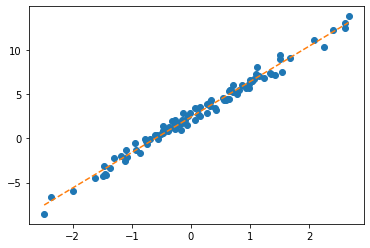

In [50]:
plt.plot(x,y,'o') 
plt.plot(x,X@What.data,'--')

-   note: 왜 What = What - alpha\*What.grad 는 안되는지?

## ver2: loss = mean squared error = MSE

In [71]:
alpha = 1/10
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.mean((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [72]:
What

# step1의 다른버전: torch.nn.Linear()

## ver1: bias=True

In [96]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1, out_features=1, bias=True) 

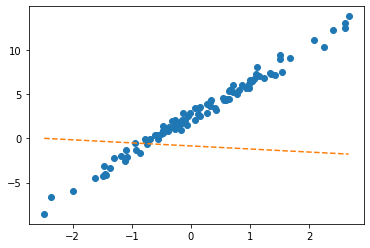

In [83]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` net에서 $\hat{w}_0, \hat{w}_1$ 의 값은?

In [84]:
net.weight # w1 

In [86]:
net.bias # w0 

In [98]:
_yhat = -0.8470 + -0.3467*x 

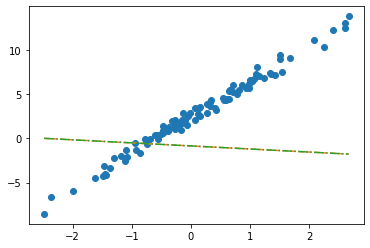

In [100]:
plt.plot(x,y,'o')
plt.plot(x, _yhat,'--')
plt.plot(x,net(x).data,'-.')

`-` 수식표현:
$\hat{y}_i = \hat{w}_0 + \hat{w}_1 x_i = \hat{b} + \hat{w}x_i = -0.8470 + -0.3467 x_i$
for all $i=1,2,\dots,100$.

## ver2

`-` 입력이 x가 아닌 X를 넣고 싶다면? (보통 잘 안하긴 해요, 왜?
bias=False로 주는게 귀찮거든요) - X는 바이어스가 고려된 상황

In [104]:
net(X) ## 그대로 쓰면 당연히 에러

In [105]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2, out_features=1, bias=False) 

In [106]:
net.weight

In [107]:
net.bias

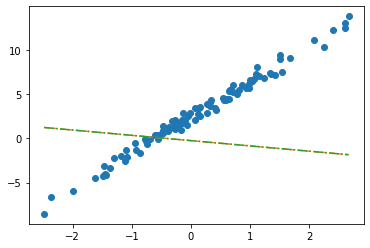

In [122]:
plt.plot(x,y,'o') 
plt.plot(x,net(X).data, '--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]), '-.')

`-` 수식표현:
$\hat{\bf y} = {\bf X} {\bf \hat W} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix}$

## 잘못된사용1

In [123]:
_x = x.reshape(-1)

In [124]:
_x

In [125]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1,out_features=1) 

In [126]:
net(_x)

## 잘못된사용2

In [127]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2,out_features=1) # bias=False를 깜빡..

In [128]:
net.weight

In [129]:
net.bias

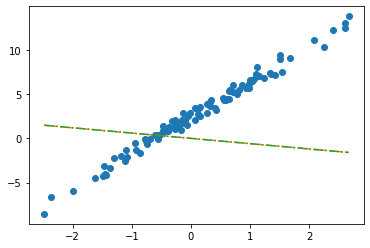

In [133]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]])+0.2549,'-.')

-   수식표현:
    $\hat{\bf y} = {\bf X} {\bf \hat W} + \hat{b}= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix} + 0.2549$

# 숙제

`(1)` 자신의 학번을 seed로 설정하고 표준정규분포에서 5개의 난수를
생성하고 순서대로 정렬한 뒤 이를 `x`로 저장하라. (아래코드참고)

``` python
torch.manual_seed(202043052) 
x,_ = torch.randn(5).sort()
```

`(2)` 아래와 같이 torch.nn.Linear()를 이용하여 적당한 네트워크를
생성하고 “최초의 직선” $\hat{y}_i$가 아래와 같이 구해지도록 `net.weight`
혹은 `net.bias`의 값을 수정하라.

$$ \hat{y}_i = 2.5 x_i - 7, \quad i=1,2,3,4,5 $$

단, $x_1,x_2,\dots,x_5$는 `x`의 원소이다.

> note: 공부를 위해서 bias를 넣은 버전과 넣지 않는 버전 모두 계산해
> 보세요. (숙제제출은 한 방법으로만 구현해도 무방)

**(풀이)**

In [34]:
torch.manual_seed(202043052) 
x,_ = torch.randn(5).sort()
x = x.reshape(-1,1)
X = torch.concat([torch.ones(5).reshape(-1,1),x],axis=1)

In [36]:
x,X

**(ver1) bias를 넣음**

In [45]:
net1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
net1.weight.data, net1.bias.data

In [46]:
net1.weight.data = torch.tensor([[2.5]])
net1.bias.data = torch.tensor([-7.0])
net1.weight.data, net1.bias.data

In [47]:
net1(x), 2.5*x-7

**(ver2) bias를 넣지 않음**

In [48]:
net2=torch.nn.Linear(in_features=2,out_features=1,bias=False) 
net2.weight.data, net2.bias

In [49]:
net2.weight.data = torch.tensor([[-7.0, 2.5]])
net2.weight.data

In [51]:
net2(X), 2.5*x-7